## Data Viz

This file builds the visualizations used in the exploratory data analysis portion of the final project report.
For the graphs displaying the model's respective outputs, see the three RF_Model files.

In [4]:
import pandas as pd
import numpy as np
import random

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

random.seed(1137)

In [5]:
# bring in the datasets with categorical data for plotting the distributions of categories before 
# transforming into dummy variables for feeding into the models

austin = pd.read_csv('data/processed/austin_pre_dv.csv')
louisville = pd.read_csv('data/processed/louisville_pre_dv.csv')
dallas = pd.read_csv('data/processed/dallas_pre_dv.csv')

In [6]:
# Split the data into a training and test dataset partitioning 75% of the data into the training data, and
# holding out 25% of the data as a test set. Set a seed to replicate.

ay = austin[['euthanasia']]
aX = austin.drop(columns=['euthanasia'])

train_aX, test_aX, train_ay, test_ay = train_test_split(aX,ay,test_size = .25,random_state=1137)

ly = louisville[['euthanasia']]
lX = louisville.drop(columns=['euthanasia'])

train_lX, test_lX, train_ly, test_ly = train_test_split(lX,ly,test_size = .25,random_state=1137)

dy = dallas[['euthanasia']]
dX = dallas.drop(columns=['euthanasia'])

train_dX, test_dX, train_dy, test_dy = train_test_split(dX,dy,test_size = .25,random_state=1137)

In [7]:
# join all of the non-y variables together for aggregate plotting
train_X = train_aX.merge(train_lX, how='outer')
train_X = train_X.merge(train_dX, how='outer')
train_X.shape

(161673, 248)

In [8]:
train_X.columns

Index(['intake_type', 'intake_condition', 'intake_repro', 'gender', 'city',
       'days_in', 'age_days', 'affenpinscher', 'afghan hound',
       'airedale terrier',
       ...
       'gray', 'merle', 'red', 'sable', 'tan', 'tick', 'tricolor', 'white',
       'yellow', 'intake_subtype'],
      dtype='object', length=248)

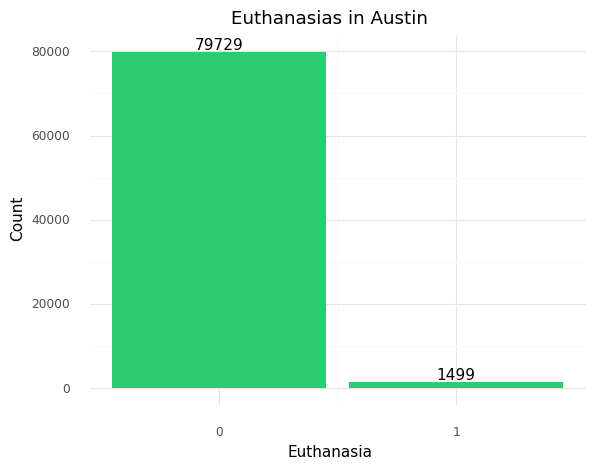

<ggplot: (8780936248263)>

In [9]:
(
ggplot(train_ay, aes(x='euthanasia')) + 
    geom_bar(fill="#2ecc71") + 
    labs(title="Euthanasias in Austin", y='Count', x="Euthanasia") + 
    scale_x_continuous(breaks=(0,1)) + 
     geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 ) + 
theme_minimal()
)

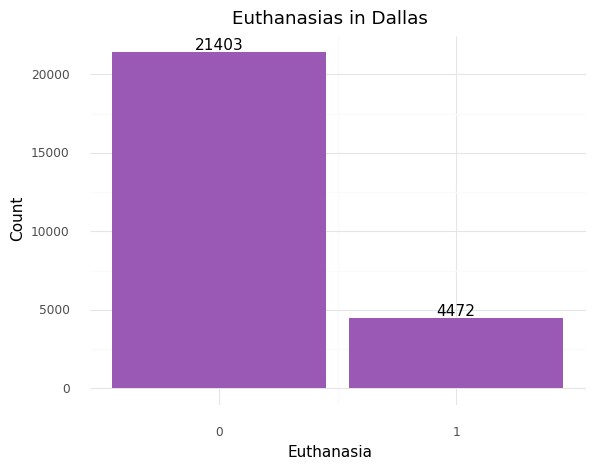

<ggplot: (8780936247799)>

In [10]:
(
ggplot(train_dy, aes(x='euthanasia')) + 
    geom_bar(fill="#9b59b6") + 
    labs(title="Euthanasias in Dallas", y='Count', x="Euthanasia") + 
    scale_x_continuous(breaks=(0,1)) + 
     geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 ) + 
    theme_minimal()

)

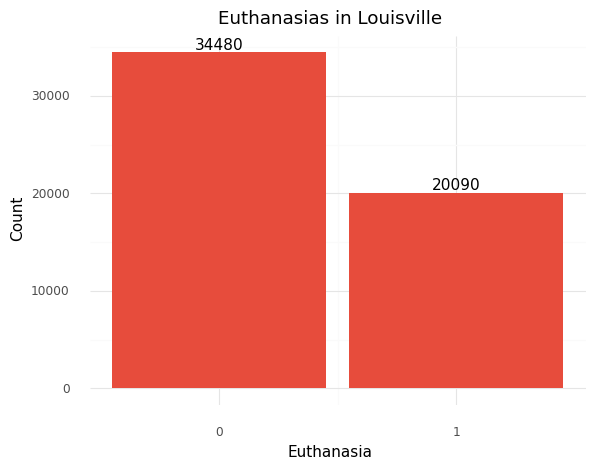

<ggplot: (8780936191669)>

In [11]:
(
ggplot(train_ly, aes(x='euthanasia')) + 
    geom_bar(fill="#e74c3c") + 
    labs(title="Euthanasias in Louisville", y='Count', x="Euthanasia") + 
    scale_x_continuous(breaks=(0,1)) + 
     geom_text(
     aes(label=after_stat('count')),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 ) +
    theme_minimal()

)

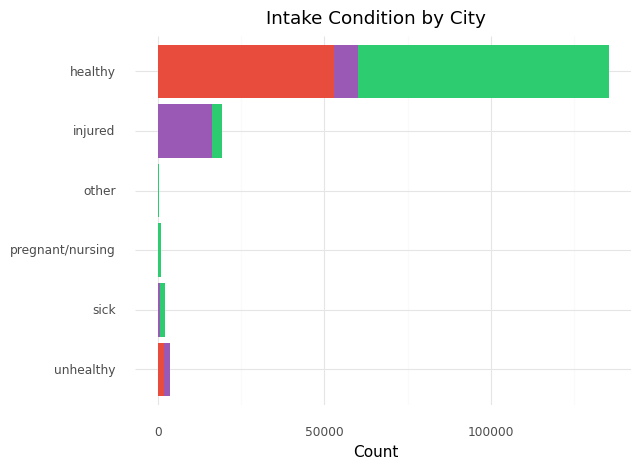

<ggplot: (8780936675377)>

In [12]:
(
ggplot(train_X, aes(x='intake_condition', fill='city')) + 
    labs(title='Intake Condition by City', y='Count', x='', fill='') + 
    geom_bar() +  
    scale_x_discrete(limits=('unhealthy', 'sick',  'pregnant/nursing', 'other', 'injured','healthy')) + 
    coord_flip() + 
    scale_fill_manual(values =("#2ecc71","#9b59b6", "#e74c3c"), guide=None) + 
    theme_minimal()
)

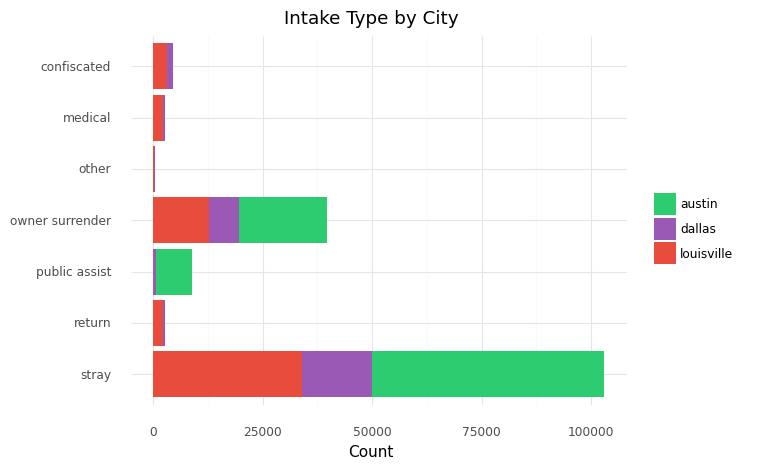

<ggplot: (8780936675837)>

In [13]:
(
ggplot(train_X, aes(x='intake_type', fill='city')) + 
    labs(title='Intake Type by City', x='', y='Count', fill='') + 
    geom_bar() +
    scale_x_discrete(limits=('stray','return','public assist','owner surrender',
                             'other','medical','confiscated')) + 
    coord_flip() + 
    scale_fill_manual(values =("#2ecc71","#9b59b6", "#e74c3c")) + 
    theme_minimal()
    
)